In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the csv file into a pandas dataframe
total_demand_nsw = pd.read_csv('../data/totaldemand_nsw.csv')
total_demand_nsw.head()

,DATETIME,TOTALDEMAND,REGIONID
0,1/1/2010 0:00,8038.00,NSW1
1,1/1/2010 0:30,7809.31,NSW1
2,1/1/2010 1:00,7483.69,NSW1
3,1/1/2010 1:30,7117.23,NSW1
4,1/1/2010 2:00,6812.03,NSW1


In [3]:
#drop the REGIONID column
total_demand_nsw = total_demand_nsw.drop(columns=['REGIONID']) 
total_demand_nsw.head()

,DATETIME,TOTALDEMAND
0,1/1/2010 0:00,8038.00
1,1/1/2010 0:30,7809.31
2,1/1/2010 1:00,7483.69
3,1/1/2010 1:30,7117.23
4,1/1/2010 2:00,6812.03


In [4]:
#copy the dataframe
df = total_demand_nsw.copy()



In [5]:
#chnage the dateformat of DATETIME to format "%m/%d/%Y %H:%M:%S"
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format="%d/%m/%Y %H:%M")
df.head()

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.00
1,2010-01-01 00:30:00,7809.31
2,2010-01-01 01:00:00,7483.69
3,2010-01-01 01:30:00,7117.23
4,2010-01-01 02:00:00,6812.03


In [6]:
df.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
dtype: object

In [7]:
#convert the DATE column to datetime format and set it as the index
df.set_index('DATETIME', inplace=True)
df.head()

,TOTALDEMAND
DATETIME,
2010-01-01 00:00:00,8038.00
2010-01-01 00:30:00,7809.31
2010-01-01 01:00:00,7483.69
2010-01-01 01:30:00,7117.23
2010-01-01 02:00:00,6812.03


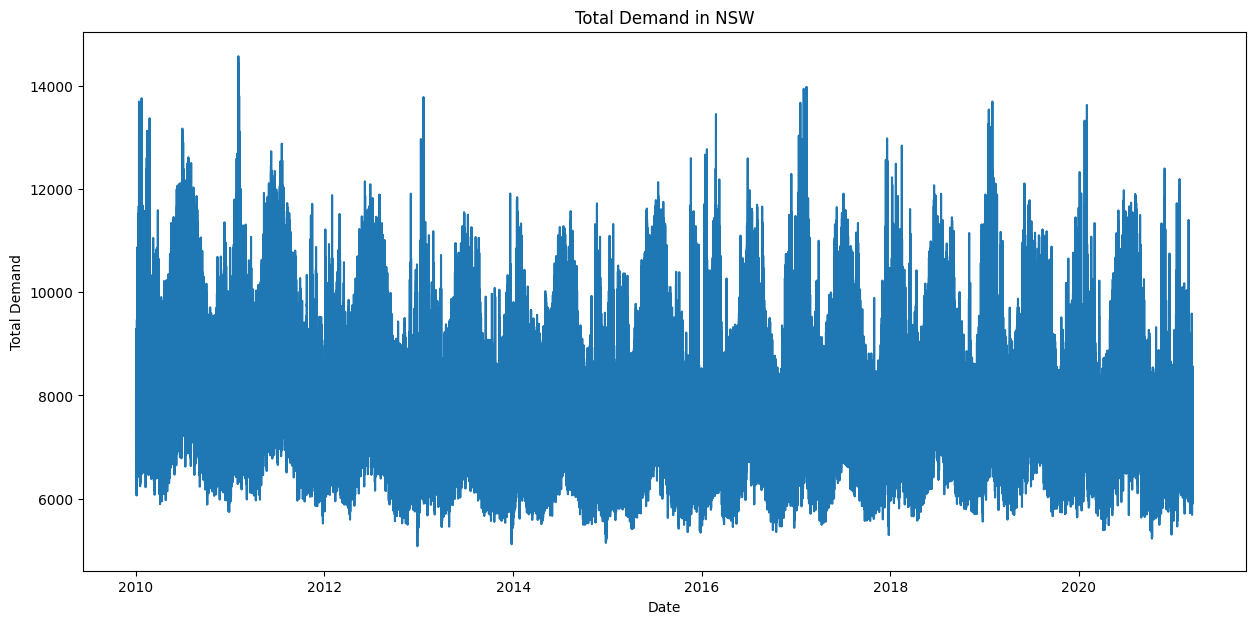

In [8]:
#plot the data
plt.figure(figsize=(15,7))
plt.plot(df)
plt.title('Total Demand in NSW')
plt.ylabel('Total Demand')
plt.xlabel('Date')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_66406/3068146174.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample('M').mean())


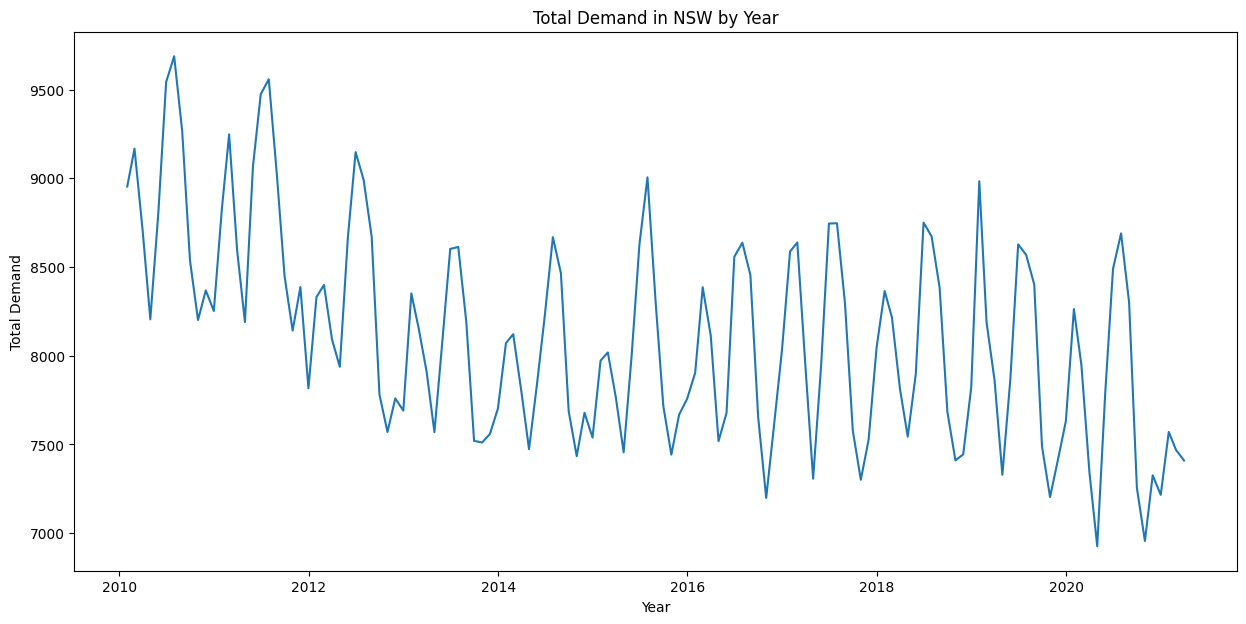

In [14]:
#plot total demand by year
plt.figure(figsize=(15,7))
plt.plot(df.resample('M').mean())
plt.title('Total Demand in NSW by Year')
plt.ylabel('Total Demand')
plt.xlabel('Year')
plt.show()


### ADF Test

In [10]:
#stationarity test for the data
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    

In [11]:
adf_test(df['TOTALDEMAND'])


Results of Dickey-Fuller Test:
Test Statistic                    -25.443152
p-value                             0.000000
#Lags Used                         80.000000
Number of Observations Used    196432.000000
Critical Value (1%)                -3.430383
Critical Value (5%)                -2.861555
Critical Value (10%)               -2.566778
dtype: float64


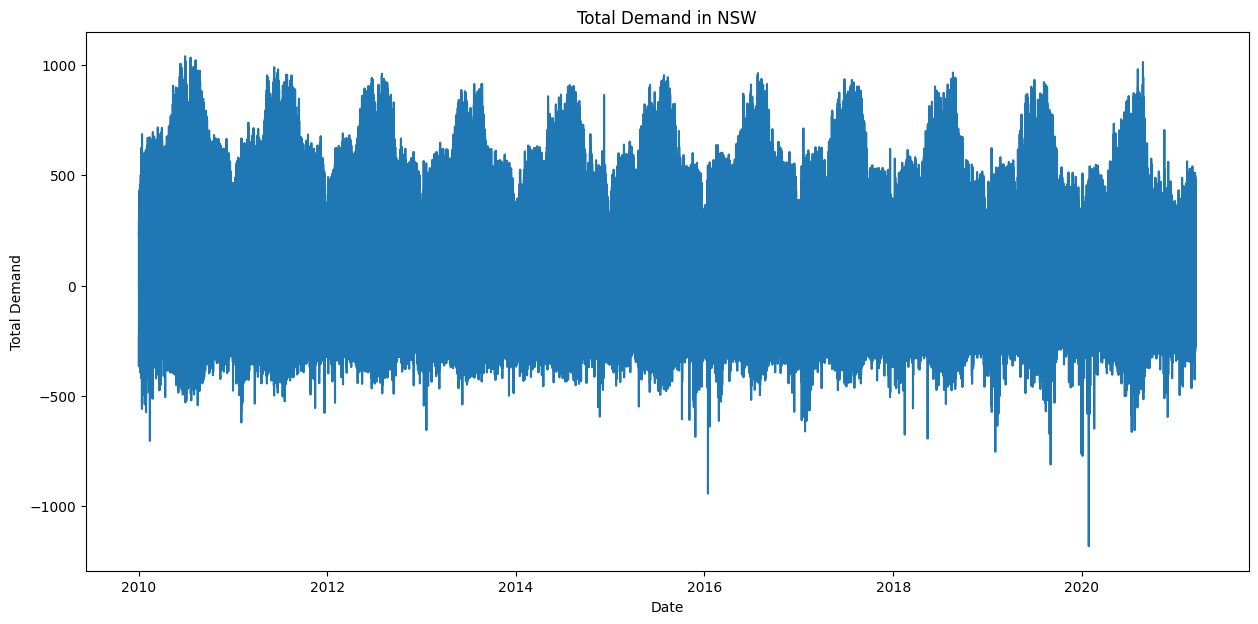

In [43]:
#plot stationary data
plt.figure(figsize=(15,7))
plt.plot(df.diff())
plt.title('Total Demand in NSW')
plt.ylabel('Total Demand')
plt.xlabel('Date')
plt.show()


In [44]:
#get the data for 2019 to 2021 and create a new dataframe
df_2019_2021 = df['2019':'2021']
df_2019_2021.head()


,TOTALDEMAND
DATETIME,
2019-01-01 00:00:00,7612.74
2019-01-01 00:30:00,7457.58
2019-01-01 01:00:00,7243.21
2019-01-01 01:30:00,6918.55
2019-01-01 02:00:00,6676.58


In [45]:
adf_test(df_2019_2021['TOTALDEMAND'])

Results of Dickey-Fuller Test:
Test Statistic                -1.112399e+01
p-value                        3.410268e-20
#Lags Used                     5.400000e+01
Number of Observations Used    3.868200e+04
Critical Value (1%)           -3.430519e+00
Critical Value (5%)           -2.861615e+00
Critical Value (10%)          -2.566810e+00
dtype: float64


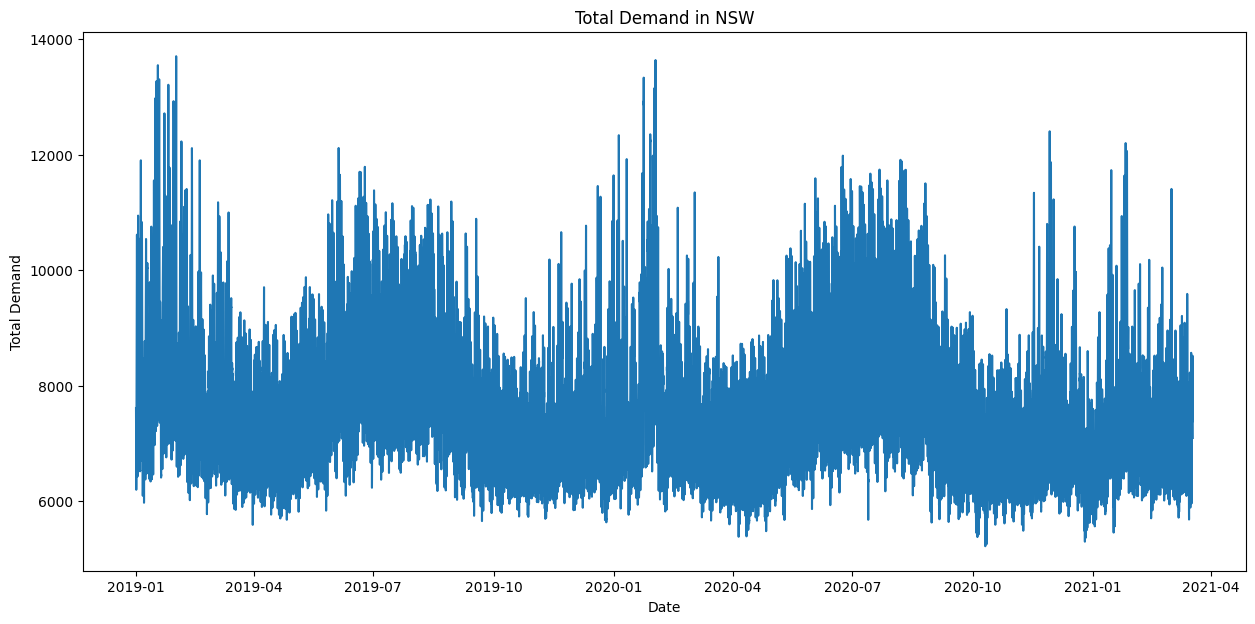

In [47]:
#plot the trend of the data
plt.figure(figsize=(15,7))
plt.plot(df_2019_2021)
plt.title('Total Demand in NSW')
plt.ylabel('Total Demand')
plt.xlabel('Date')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_78411/3356101584.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(df.resample('Y').mean())


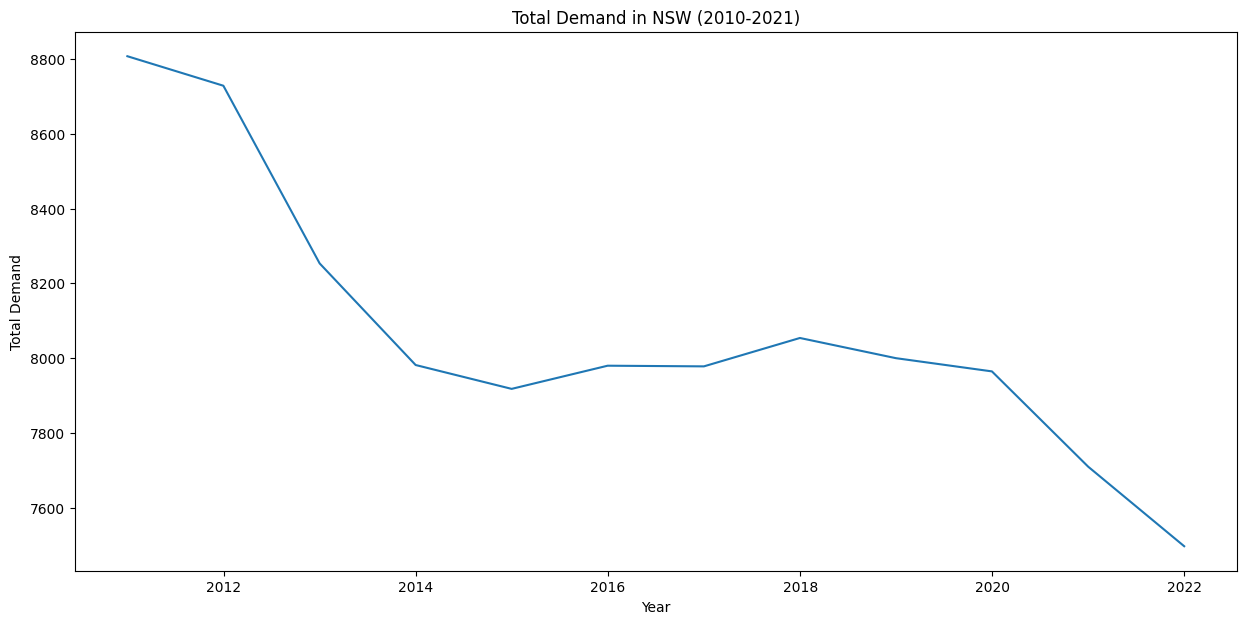

In [58]:
#plot the yearly trend of the data
plt.figure(figsize=(15,7))
plt.plot(df.resample('Y').mean())
plt.title('Total Demand in NSW (2010-2021)')
plt.ylabel('Total Demand')
plt.xlabel('Year')
plt.show()


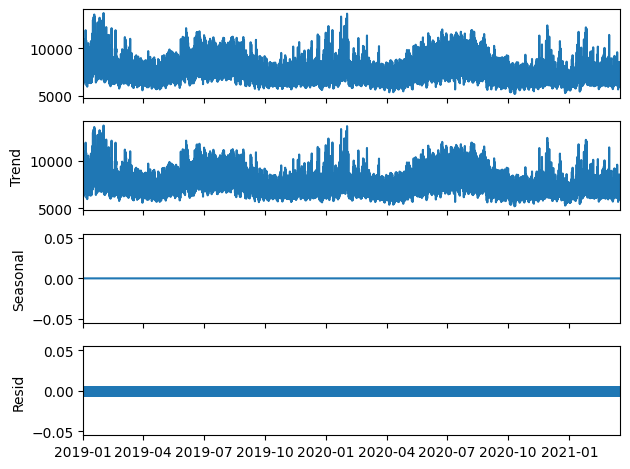

In [52]:
#plot seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_2019_2021, model='additive', period=1)
decomposition.plot()
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_78411/1172201540.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df_2019_2021.resample('M').mean().rolling(window=1).mean())


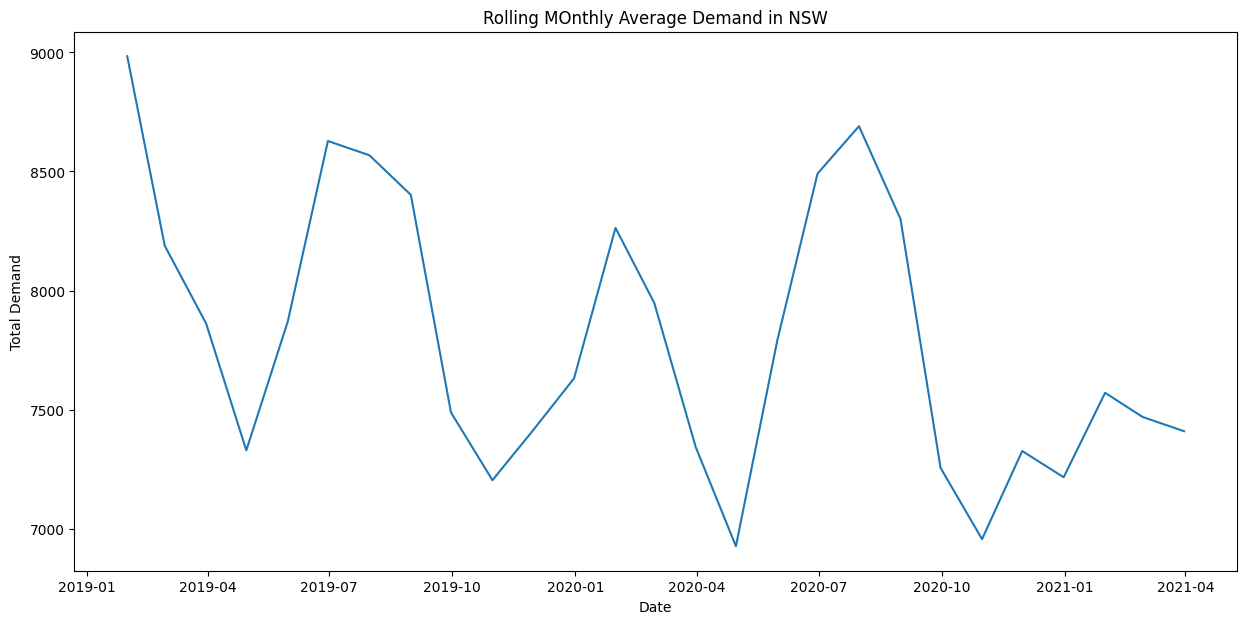

In [56]:
#plot rolling monthly average
plt.figure(figsize=(15,7))
plt.plot(df_2019_2021.resample('M').mean().rolling(window=1).mean())
plt.title('Rolling MOnthly Average Demand in NSW')
plt.ylabel('Total Demand')
plt.xlabel('Date')
plt.show()


/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_78411/2955995212.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_2019_2021.resample('M').mean().plot()


<Figure size 1500x700 with 0 Axes>

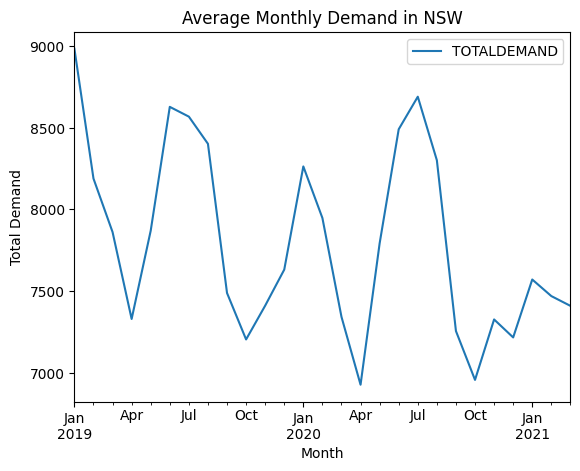

In [59]:
#plot average monthly demand
plt.figure(figsize=(15,7))
df_2019_2021.resample('M').mean().plot()
plt.title('Average Monthly Demand in NSW')
plt.ylabel('Total Demand')
plt.xlabel('Month')
plt.show()
